In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
pd.set_option('display.max_columns', None)

train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv("Data/test.csv")

In [64]:
category = train_data['category']

set_category = set()
for c in category:
    c_arr = c.split(',')
    c_arr = [x.strip() for x in c_arr if x != '' and x != '-']
    set_category.update(c_arr)
print("{} categories".format(len(set_category)))
print(set_category)



15 categories
{'low mileage car', 'direct owner sale', 'coe car', 'sgcarmart warranty cars', 'sta evaluated car', 'consignment car', 'premium ad car', 'parf car', 'imported used vehicle', 'opc car', 'vintage cars', 'almost new car', 'electric cars', 'rare & exotic', 'hybrid cars'}


============================mileage============================
count    1.969600e+04
mean     8.593014e+04
std      5.162519e+04
min      1.000000e+00
25%      5.032475e+04
50%      8.400000e+04
75%      1.160000e+05
max      1.290000e+06
Name: mileage, dtype: float64
corelation with price: -0.39254659893340793


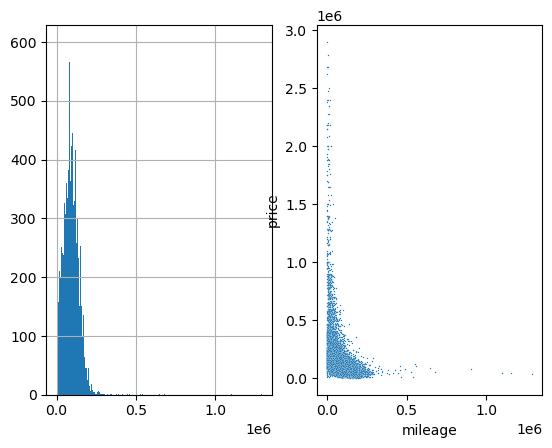

In [65]:
def show_hist(data: pd.Series):
    print("============================{}============================".format(data.name))
    data_x = data
    data_y = train_data['price']
    ax1 = plt.subplot(1, 2, 1)
    data.hist(bins=500, ax=ax1)
    ax2 = plt.subplot(1, 2, 2)
    sns.scatterplot(x=data_x, y=data_y, ax=ax2, s=1)
    print(data.describe())
    print("corelation with price: {}".format(data.corr(train_data['price'])))
    
# show_hist(train_data['curb_weight'])
# show_hist(train_data['manufactured'])
# show_hist(train_data['engine_cap'])
# show_hist(train_data['power'])
# show_hist(train_data['depreciation'])
# show_hist(train_data['coe'])
# show_hist(train_data['road_tax'])
# show_hist(train_data['dereg_value'])
show_hist(train_data['mileage'])
# show_hist(train_data['omv'])
# show_hist(train_data['arf'])

In [79]:
from category_encoders import BinaryEncoder, OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

def show_corr(data):
    print("============================{}============================".format(data.name))
    data_x = data
    data_y = train_data['price']
    ax1 = plt.subplot(1, 1, 1)
    sns.scatterplot(x=data_x, y=data_y, ax=ax1, s=1)
    corr = data.corr(train_data['price'])
    print("corelation with price: {}".format(corr))
    return corr


# model
# model_binary_encoder = OneHotEncoder()
# model_labels = model_binary_encoder.fit_transform(train_data["model"])
# model_labels = model_labels['model_1']
# corr = show_corr(model_labels)
# with open('log.txt', 'w') as f:
#     for i in range(1, len(corr)+1):
#         model_name = "model_{}".format(i)
#         f.write("{}: {}\n".format(model_name, corr[model_name]))
        
# type_of_vehicle
type_of_vehicle_binary_encoder = OneHotEncoder()
type_of_vehicle_labels = type_of_vehicle_binary_encoder.fit_transform(train_data["type_of_vehicle"])
type_of_vehicle_labels = pd.DataFrame(type_of_vehicle_labels)
show_corr(type_of_vehicle_labels['type_of_vehicle_1'])

corr = type_of_vehicle_labels.corrwith(train_data['price'])
print(corr)

# category
# train_data["category"] = train_data["category"].map(
#     lambda c : [_c.strip() for _c in c.split(",") if _c != "" and _c != "-"]
# )
# category_encoder = MultiLabelBinarizer()
# category_labels = category_encoder.fit_transform(train_data["category"]).astype(np.float64)
# category_labels = pd.DataFrame(category_labels, columns=["category_" + c for c in category_encoder.classes_])
# corr = category_labels.corrwith(train_data['price'])
# print(corr)

# transmission
# transmission_binary_encoder = OneHotEncoder()
# transmission_labels = transmission_binary_encoder.fit_transform(train_data["transmission"])
# transmission_labels = pd.DataFrame(transmission_labels)
# corr = transmission_labels.corrwith(train_data['price'])
# print(corr)



AttributeError: 'DataFrame' object has no attribute 'name'

(array([4, 1, 1, ..., 0, 0, 1], dtype=int64), array([1.48605410e-03, 9.94275629e-03, 1.83994585e-02, ...,
       8.45515946e+01, 8.45600513e+01, 8.45685080e+01]))


<Axes: ylabel='Count'>

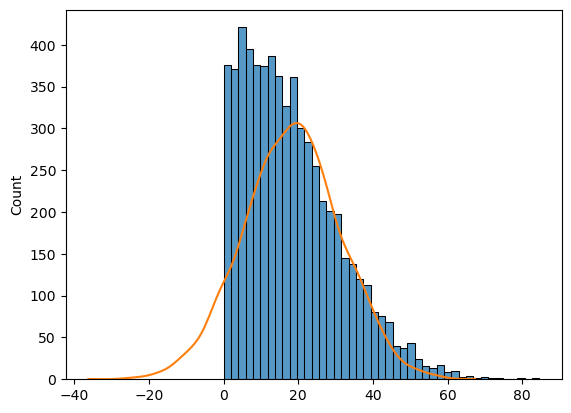

In [134]:
from matplotlib.pylab import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

normal_distribution = np.random.normal(5, 20, 10000)
noise = np.random.uniform(0, 1.5, 10000)
X = normal_distribution + noise
X = X[X > -0]

scaler = StandardScaler()
scaler.fit(X.reshape(-1, 1))
fit_X = np.random.normal(scaler.mean_, scaler.scale_, 5000)
fit_hist = np.histogram(X, bins=10000)
print(fit_hist)

fig, ax = plt.subplots()
sns.histplot(X, ax=ax)
sns.histplot(fit_X, ax=ax, alpha=0.0, kde=True, element='bars', linestyle='none')






1.0 1.0 1.0


C:\Users\13785\AppData\Local\Temp\ipykernel_14096\766538800.py:25: OptimizeWarning: Covariance of the parameters could not be estimated
  parameters, covariance = curve_fit(Gauss, xdata, ydata)


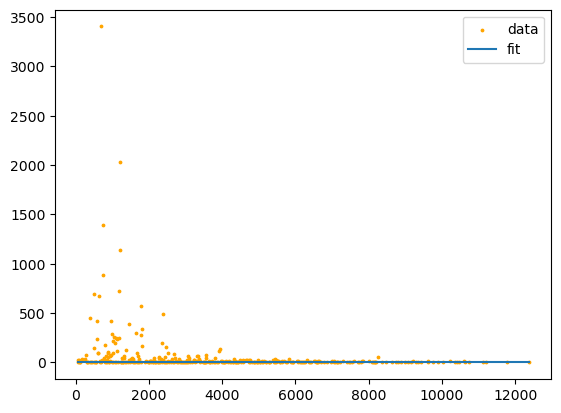

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from scipy.optimize import curve_fit

X = train_data['road_tax']
X = X.dropna()
X = np.array(X)
hist, binedge = np.histogram(X, bins=1000)
xdata = [(binedge[i] + binedge[i+1]) / 2 for i in range(len(binedge) - 1)]
ydata = hist

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

mask = ydata > 0
xdata = xdata[mask] / 1
ydata = ydata[mask] / 1

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A * np.exp(-((x - B)**2) / (2 * C**2))
    return y
# parameters, covariance = curve_fit(Gauss, xdata, ydata, p0=[2500, 1300, 2], maxfev=100000, bounds=([0, 0, 0], [10000, 2000, 20]))
parameters, covariance = curve_fit(Gauss, xdata, ydata)

fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
print(fit_A, fit_B, fit_C)

fit_y = Gauss(xdata, fit_A, fit_B, fit_C)
plt.scatter(xdata, ydata, label='data', s=3, color='orange')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()